In [ ]:
import pandas as pd
# This result file has been generated via multiprocess_general_stats.py
res_data = pd.read_csv("result_files/general_stats.csv")
res_data.head()

,Unnamed: 0.1,Unnamed: 0,job_id,mat,is_bpe,v_size,freq_cutoff,sim_cutoff,tkz_path,p_ratio,m_ratio,ulength_mean,ulength_std,util10,util30,util50,used_ulength_mean,used_ulength_std,used_p_ratio,used_m_ratio
0,0,0,0,blosum62,False,800,0.0,0.7,hf_uniref50_mutbpe_0.7_3_12_0_800.json,0.055000,0.538750,2.642500,0.672874,0.986250,0.973750,0.963750,1.873839,0.578712,0.026844,0.079386
1,1,1,1,blosum62,True,6400,NaN,NaN,hf_uniref50_bpe_6400.json,0.000000,0.000000,3.428750,0.710635,0.999219,0.999062,0.998906,2.459919,0.711365,0.000000,0.000000
2,2,2,2,blosum62,False,51200,0.1,0.7,hf_uniref50_mutbpe_0.7_3_12_0.1_51200.json,0.076959,0.911910,4.097756,1.191468,0.849069,0.506434,0.330547,2.983322,0.948284,0.150889,0.534866
3,3,3,3,blosum62,False,1600,0.2,0.8,hf_uniref50_mutbpe_0.8_3_12_0.2_1600.json,0.199375,0.410625,2.775625,0.501685,0.997500,0.996875,0.996875,2.096339,0.593659,0.088697,0.069341
4,4,4,4,blosum62,False,51200,0.2,0.8,hf_uniref50_mutbpe_0.8_3_12_0.2_51200.json,0.191523,0.759121,4.129199,1.397950,0.904473,0.531484,0.334102,3.015828,0.998908,0.233940,0.338278


In [8]:
config_mask = res_data["is_bpe"] == False
# config_mask = res_data == res_data

utildata = res_data[config_mask].groupby(["v_size"])["m_ratio"].mean().reset_index()

<>:68: SyntaxWarning: invalid escape sequence '\p'
<>:116: SyntaxWarning: invalid escape sequence '\p'
<>:68: SyntaxWarning: invalid escape sequence '\p'
<>:116: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_1490225/3646548625.py:68: SyntaxWarning: invalid escape sequence '\p'
  ax1.set_ylabel("Unit Length (mean $\pm$ std)", fontsize=12)
/tmp/ipykernel_1490225/3646548625.py:116: SyntaxWarning: invalid escape sequence '\p'
  ax2.set_ylabel("Observed Unit Length (mean $\pm$ std)", fontsize=12)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


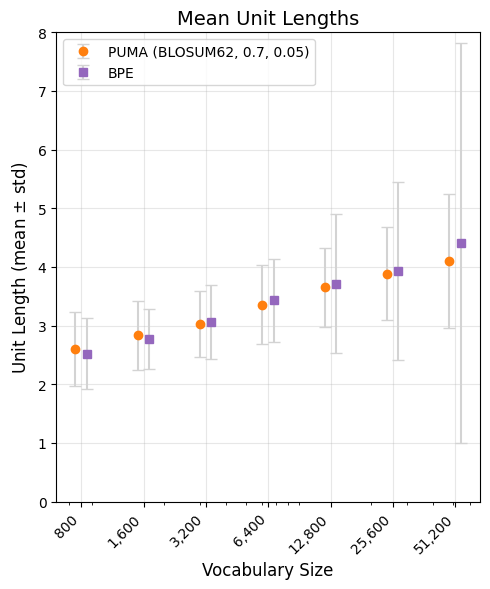

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


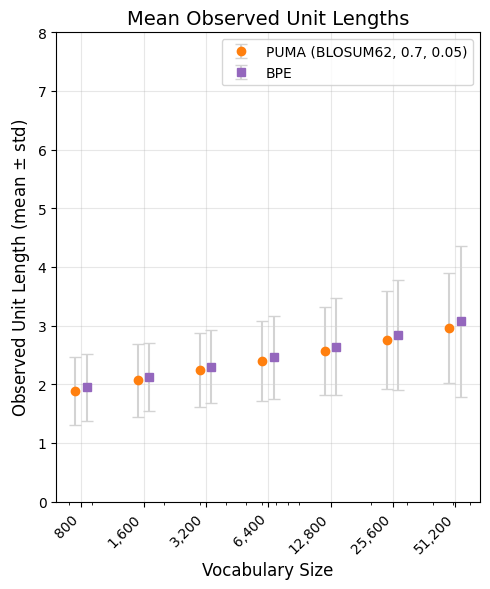

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

v_sizes = np.array([800, 1600, 3200, 6400, 12800, 25600, 51200])
num_data_points = len(v_sizes)

mask1 = res_data["tkz_path"].str.startswith("hf_uniref50_mutbpe_0.7_3_12_0.05") & (res_data["mat"] == "blosum62")
mask2 = res_data["tkz_path"].str.startswith("hf_uniref50_bpe")
df1 = res_data[mask1].sort_values(by=["v_size"])
df2 = res_data[mask2].sort_values(by=["v_size"])

# Note: The original code used filt
# prepare x values with offsets
x = df1["v_size"].values
offset = 50  # small offset so error bars don’t clash

# Log scale dependent offset calculation
# The base logic seems to be adding a fixed offset in linear space.
# For log-scaled axes, a better visual offset is proportional to x.
# The original calculation uses an exponential factor derived from the index,
# which works well for the increasing v_size values.
x1 = x - offset * (2 ** np.arange(0, 7))
x2 = x + offset * (2 ** np.arange(0, 7))

# Colorblind-friendly colors (replacing tab:orange and tab:purple)
COLOR_PUMA = "tab:orange" # Orange
COLOR_BPE = "tab:purple"  # Reddish Purple

# --------------------------------------------------------------------
# PLOT 1: Unit Length (mean)
# --------------------------------------------------------------------

fig1, ax1 = plt.subplots(1, 1, figsize=(5, 6)) # Split and resize for aspect ratio

# Plot PUMA
ax1.errorbar(
    x1,
    df1["ulength_mean"],
    yerr=df1["ulength_std"],
    fmt="o",
    color=COLOR_PUMA,
    ecolor="lightgray",
    elinewidth=1.5,
    capsize=4,
    label="PUMA (BLOSUM62, 0.7, 0.05)"
)

# Plot BPE
ax1.errorbar(
    x2,
    df2["ulength_mean"],
    yerr=df2["ulength_std"],
    fmt="s",
    color=COLOR_BPE,
    ecolor="lightgray",
    elinewidth=1.5,
    capsize=4,
    label="BPE"
)

# --- labels, legend, cosmetics ---
ax1.set_xscale("log")
# --- customize ticks ---
ax1.set_xticks(x)  
ax1.set_xticklabels([f"{v:,}" for v in x], rotation=45, ha="right")  
ax1.set_xlabel("Vocabulary Size", fontsize=12)
ax1.set_ylabel("Unit Length (mean $\pm$ std)", fontsize=12)
ax1.set_ylim(bottom=0, top=8)
ax1.set_title("Mean Unit Lengths", fontsize=14)
ax1.legend()
ax1.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("unitlength_a.eps")
plt.show()

# --------------------------------------------------------------------
# PLOT 2: Observed Unit Length (used_mean)
# --------------------------------------------------------------------

fig2, ax2 = plt.subplots(1, 1, figsize=(5, 6)) # Split and resize for aspect ratio

# Plot PUMA
ax2.errorbar(
    x1,
    df1["used_ulength_mean"],
    yerr=df1["used_ulength_std"],
    fmt="o",
    color=COLOR_PUMA,
    ecolor="lightgray",
    elinewidth=1.5,
    capsize=4,
    label="PUMA (BLOSUM62, 0.7, 0.05)"
)

# Plot BPE
ax2.errorbar(
    x2,
    df2["used_ulength_mean"],
    yerr=df2["used_ulength_std"],
    fmt="s",
    color=COLOR_BPE,
    ecolor="lightgray",
    elinewidth=1.5,
    capsize=4,
    label="BPE"
)

# --- labels, legend, cosmetics ---
ax2.set_xscale("log")
# --- customize ticks ---
ax2.set_xticks(x)  
ax2.set_xticklabels([f"{v:,}" for v in x], rotation=45, ha="right")  
ax2.set_xlabel("Vocabulary Size", fontsize=12)
ax2.set_ylabel("Observed Unit Length (mean $\pm$ std)", fontsize=12)
ax2.set_ylim(bottom=0, top=8)
ax2.set_title("Mean Observed Unit Lengths", fontsize=14)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
# plt.savefig("unitlength_b.eps")
plt.show()

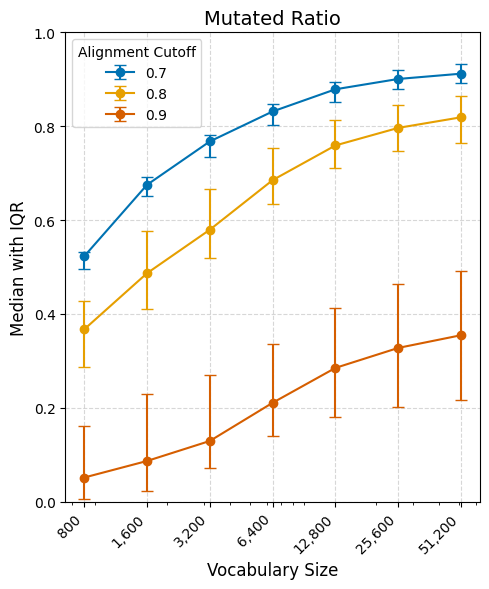

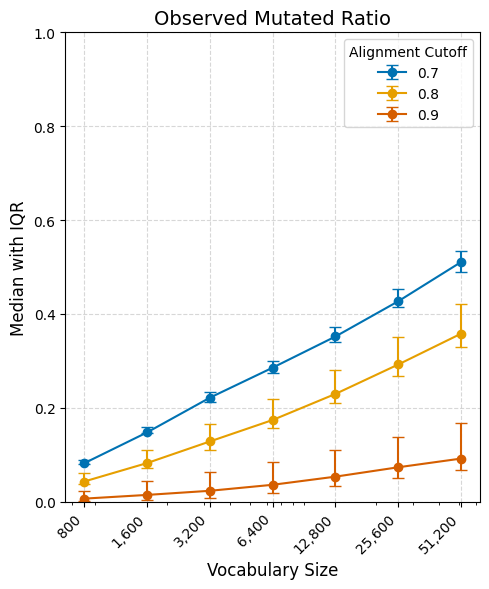

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


v_sizes = np.array([800, 1600, 3200, 6400, 12800, 25600, 51200])
sim_cutoffs = [0.7, 0.8, 0.9]


# Colorblind-friendly colors (Kept from original request)
colors = {
    0.7: "#0072B2",  # Blue
    0.8: "#E69F00",  # Orange
    0.9: "#D55E00",  # Red-Orange
}

def create_ratio_plot(metric_col, title, filename):
    """Aggregates data and creates a single errorbar plot."""
    
    # 1. Aggregate: median, 25th, and 75th percentile
    grouped = (
        res_data[config_mask]
        .groupby(["v_size", "sim_cutoff"])[metric_col]
        .agg([
            ("median", "median"),
            ("q25", lambda x: x.quantile(0.25)),
            ("q75", lambda x: x.quantile(0.75)),
        ])
        .reset_index()
    )

    # 2. Compute asymmetric error bars: median ± (q75 - q25)
    grouped["yerr_lower"] = grouped["median"] - grouped["q25"]
    grouped["yerr_upper"] = grouped["q75"] - grouped["median"]

    # 3. Pivot for easier plotting
    pivot_median = grouped.pivot(index="v_size", columns="sim_cutoff", values="median")
    pivot_yerr_lower = grouped.pivot(index="v_size", columns="sim_cutoff", values="yerr_lower")
    pivot_yerr_upper = grouped.pivot(index="v_size", columns="sim_cutoff", values="yerr_upper")

    # 4. Create Figure and Axis (Aspect ratio adjusted to 5x6)
    fig, ax = plt.subplots(1, 1, figsize=(5, 6))
    
    # 5. Plot error bars using asymmetric yerr
    for sim_cutoff in pivot_median.columns:
        ax.errorbar(
            pivot_median.index,                 # x = v_size
            pivot_median[sim_cutoff],           # y = median
            yerr=[pivot_yerr_lower[sim_cutoff], pivot_yerr_upper[sim_cutoff]],  
            fmt='o-',                           # line with circle markers
            capsize=4,
            label=f"{sim_cutoff}",
            color=colors[sim_cutoff]
        )

    # 6. Formatting
    ax.set_xlabel("Vocabulary Size", fontsize=12)
    ax.set_ylabel("Median with IQR", fontsize=12)
    ax.set_title(title, fontsize=14)
    ax.legend(title="Alignment Cutoff", fontsize=10, title_fontsize=10)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_xscale("log")
    
    # Set log scale ticks and labels
    x_ticks = 800 * (2**np.arange(0, 7))
    ax.set_xticks(x_ticks)
    ax.set_xticklabels([f"{v:,}" for v in x_ticks], rotation=45, ha="right")  
    ax.set_ylim(bottom=0, top=1)
    
    plt.tight_layout()
    # plt.savefig(filename) # Uncomment to save
    plt.show()

# --------------------------------------------------------------------
# GENERATE SEPARATE PLOTS
# --------------------------------------------------------------------

# Plot 1: Mutated Ratio (m_ratio)
create_ratio_plot(
    metric_col="m_ratio",
    title="Mutated Ratio",
    filename="mutated_ratio_a.eps"
)

# Plot 2: Observed Mutated Ratio (used_m_ratio)
create_ratio_plot(
    metric_col="used_m_ratio",
    title="Observed Mutated Ratio",
    filename="mutated_ratio_b.eps"
)